<a href="https://colab.research.google.com/github/sitharavs/Loan-Classification/blob/main/Loan_Eligibility_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                          DATA SCIENCE PROJECT - CREDIT RISK (Classification - Loan Eligibility Prediction)

# SUMMARY:

Credit risk is the possibility of suffering a loss if a borrower defaults on the principal and interest that they owe the lender. To offset the risk of possible losses, the lender uses the loan's interest payments. The lender's cash flow is disrupted when a borrower fails to fulfill their obligations.

In order to protect the lender from cash flow loss and lessen the severity of losses, this is a crucial consideration for banks before granting an applicant's loan.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier



#for tuning the model
from sklearn.model_selection import GridSearchCV

# import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("CreditRisk.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


# DATA TYPES

In [ ]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

# NULL VALUES

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
(df.isnull().sum()/len(df))*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### LESS THAN 20% SO WE ARE DROPPING THE NULL VALUES

In [ ]:
df1=df.dropna()

In [ ]:
df1.duplicated().sum() # NO DUPLICATES

0

In [ ]:
df1.nunique()

Loan_ID              499
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      420
CoapplicantIncome    241
LoanAmount           187
Loan_Amount_Term       9
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# DATA SUMMARY

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,499.0,5336.128257,5618.157076,150.0,2885.5,3859.0,5825.0,81000.0
CoapplicantIncome,499.0,1566.995832,2580.954598,0.0,0.0,1086.0,2251.5,33837.0
LoanAmount,499.0,139.224449,83.684395,0.0,98.0,125.0,166.5,600.0
Loan_Amount_Term,499.0,342.012024,64.860368,36.0,360.0,360.0,360.0,480.0
Credit_History,499.0,0.851703,0.355750,0.0,1.0,1.0,1.0,1.0
Loan_Status,499.0,0.683367,0.465630,0.0,0.0,1.0,1.0,1.0


# SEPERATING INTO NUMERICAL AND CATEGORICAL DATA

In [ ]:
df_num=df1.select_dtypes(exclude='object')
df_cat=df1.select_dtypes(include='object')

In [ ]:
df_num.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')

In [ ]:
df_cat.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object')

# HIST PLOT FOR NUMERICAL DATA

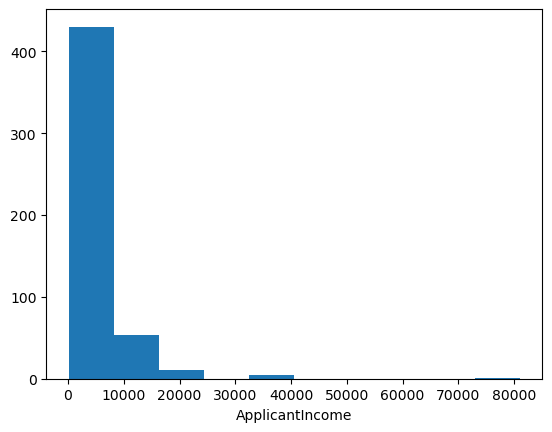

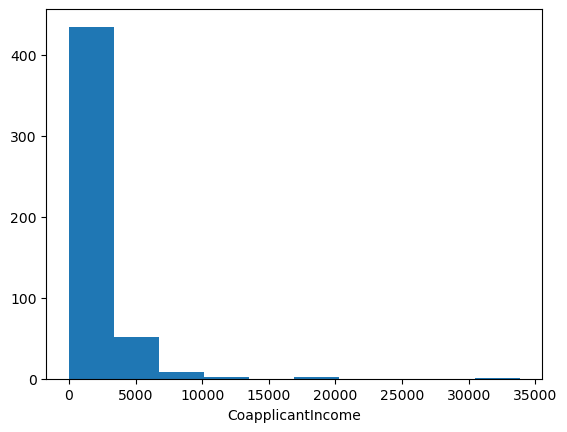

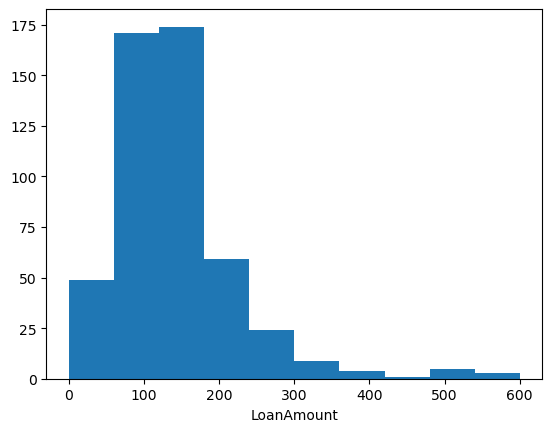

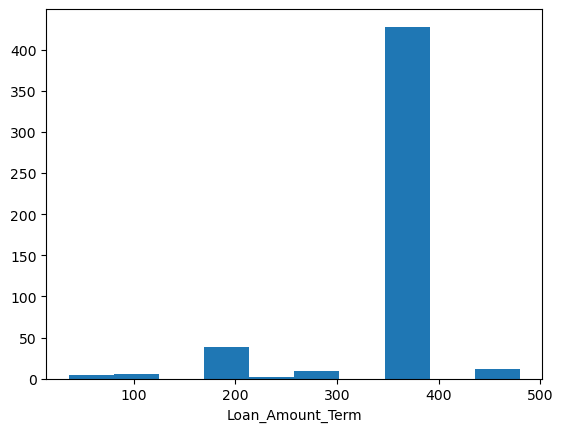

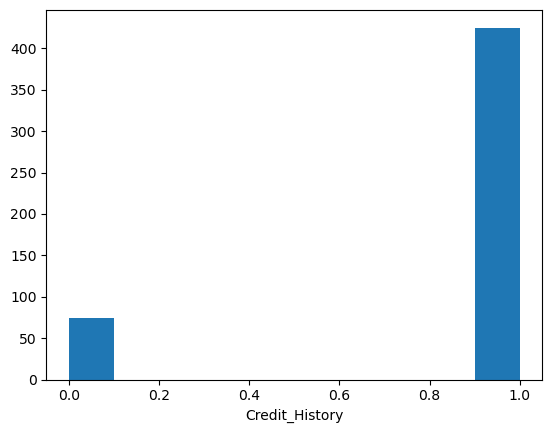

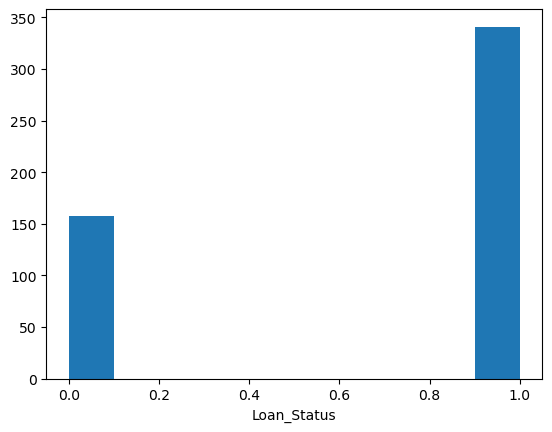

<Figure size 640x480 with 0 Axes>

In [ ]:
for i in df_num.columns:
    plt.xlabel(i)
    plt.hist(df_num[i])
    plt.figure()

# FREQUENCY PLOT FOR CATEGORICAL DATA (HIST)

In [ ]:
df_cat1=df_cat.drop(["Loan_ID"],axis=1)

In [ ]:
for i in df_cat1.columns:
    print(df_cat1[i].value_counts(),'\n')

Male      411
Female     88
Name: Gender, dtype: int64 

Yes    324
No     175
Name: Married, dtype: int64 

0     284
2      88
1      84
3+     43
Name: Dependents, dtype: int64 

Graduate        395
Not Graduate    104
Name: Education, dtype: int64 

No     430
Yes     69
Name: Self_Employed, dtype: int64 

Semiurban    195
Urban        159
Rural        145
Name: Property_Area, dtype: int64 



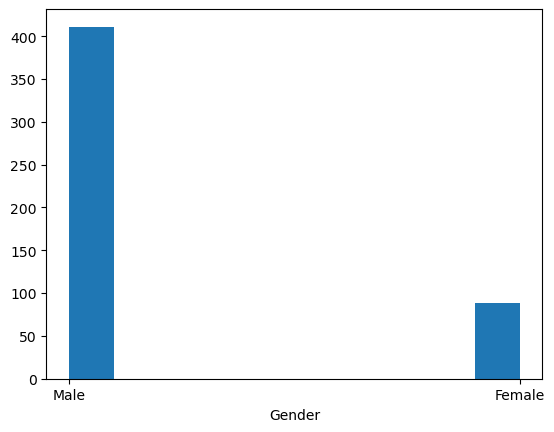

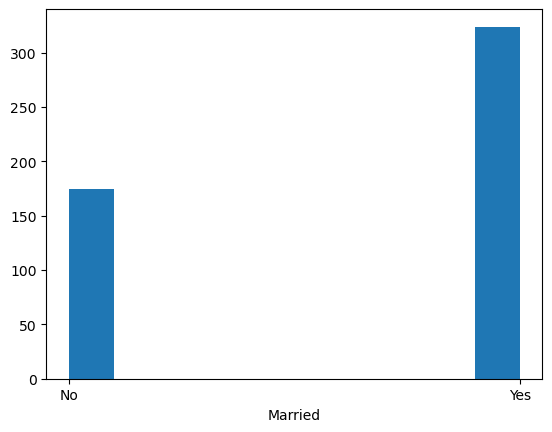

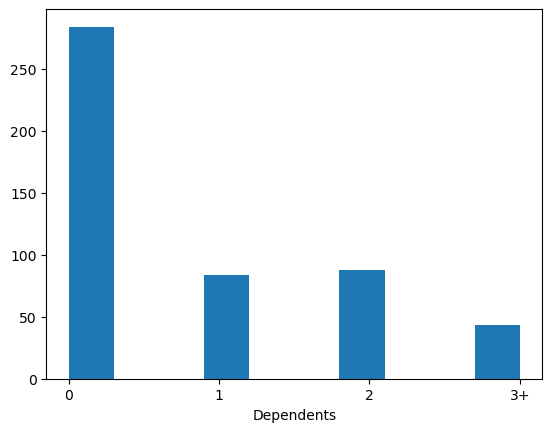

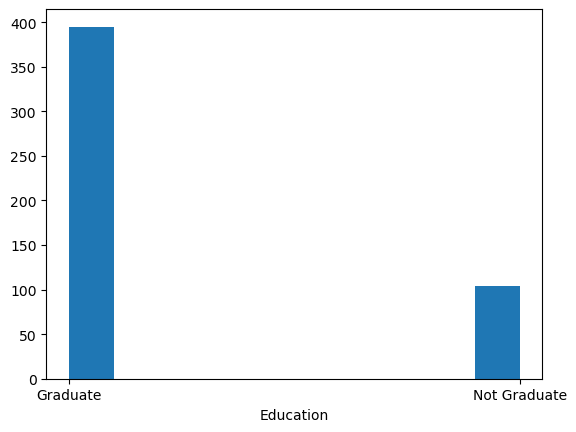

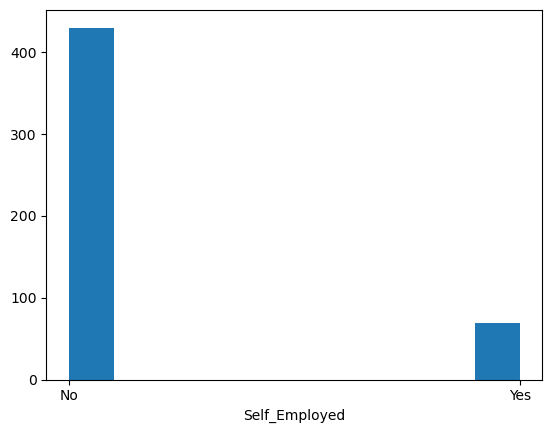

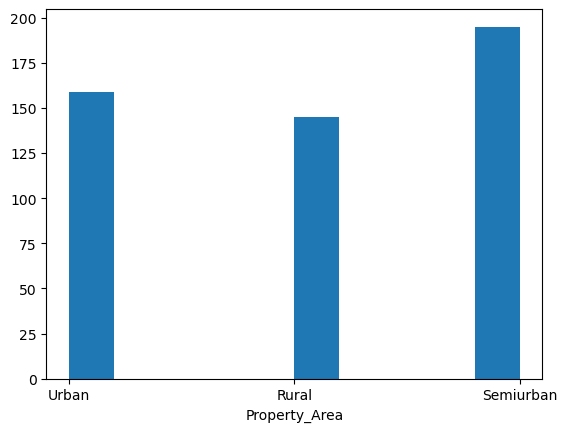

<Figure size 640x480 with 0 Axes>

In [ ]:
for i in df_cat1.columns:
    plt.xlabel(i)
    plt.hist(df_cat1[i])
    plt.figure()

# PIE CHART

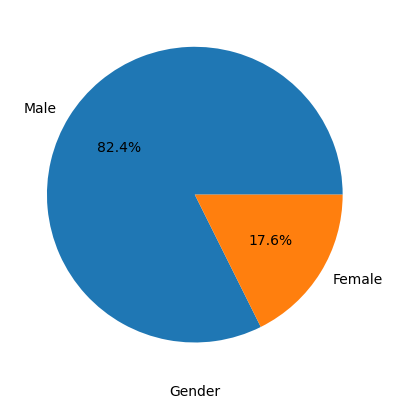

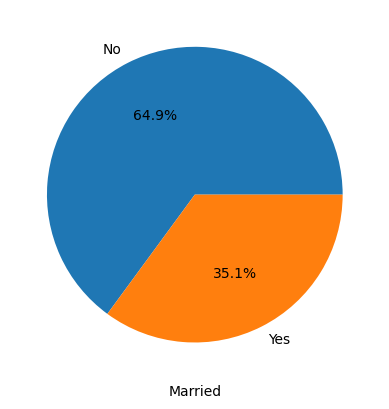

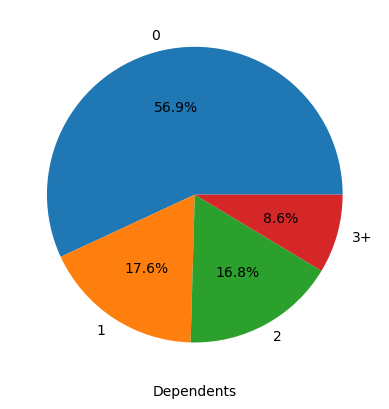

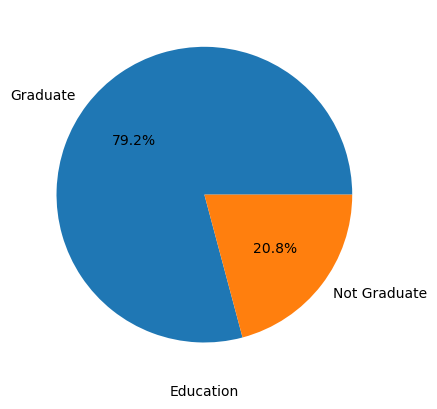

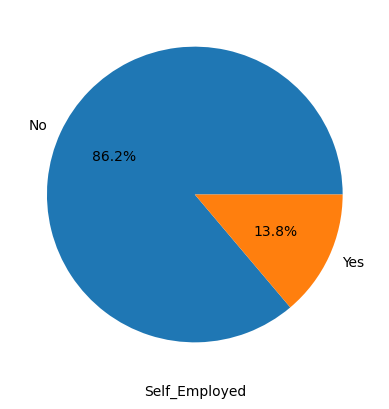

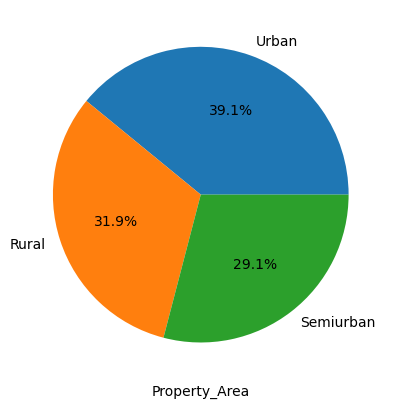

<Figure size 640x480 with 0 Axes>

In [ ]:
for i in df_cat1.columns:
    plt.xlabel(i)
    plt.pie(df_cat1[i].value_counts(),labels=df_cat1[i].unique(), autopct='%1.1f%%')
    plt.figure()

In [ ]:
df_cat2=pd.get_dummies(df_cat1,drop_first=True)
df_cat2.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0,0,0,1
1,1,1,1,0,0,0,0,0,0
2,1,1,0,0,0,0,1,0,1
3,1,1,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,1


# CONCATENATING DATA

In [ ]:
df2=pd.concat([df_num,df_cat2],1)
df2.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,0,360.0,1.0,1,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128,360.0,1.0,0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66,360.0,1.0,1,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120,360.0,1.0,1,1,1,0,0,0,1,0,0,1
4,6000,0.0,141,360.0,1.0,1,1,0,0,0,0,0,0,0,1


# CORRELATION MATRIX

In [ ]:
df2.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
ApplicantIncome,1.000000,-0.114489,0.470756,-0.007663,-0.051144,-0.044570,0.030916,0.036856,0.067253,-0.017349,0.134130,-0.139300,0.167754,0.002879,-0.056470
CoapplicantIncome,-0.114489,1.000000,0.188117,-0.008559,-0.003729,-0.042535,0.157223,0.105889,-0.021306,0.026989,-0.025548,-0.069365,-0.009958,-0.004808,0.009145
LoanAmount,0.470756,0.188117,1.000000,0.048301,-0.025927,-0.036204,0.079863,0.165084,0.073557,0.059893,0.101854,-0.184035,0.107395,0.036760,-0.112908
Loan_Amount_Term,-0.007663,-0.008559,0.048301,1.000000,0.025141,0.004116,-0.089505,-0.111472,-0.091340,-0.001060,-0.080073,-0.115226,-0.028566,0.034461,-0.075399
Credit_History,-0.051144,-0.003729,-0.025927,0.025141,1.000000,0.528158,0.028850,0.024202,-0.008185,0.030332,-0.072807,-0.063543,-0.028874,0.056834,-0.029297
Loan_Status,-0.044570,-0.042535,-0.036204,0.004116,0.528158,1.000000,0.058060,0.104630,-0.027666,0.066284,-0.021260,-0.085597,-0.026862,0.165497,-0.070781
Gender_Male,0.030916,0.157223,0.079863,-0.089505,0.028850,0.058060,1.000000,0.354135,-0.016672,0.158925,0.104617,0.056193,-0.012669,-0.114354,0.056877
Married_Yes,0.036856,0.105889,0.165084,-0.111472,0.024202,0.104630,0.354135,1.000000,0.151062,0.262935,0.150855,0.004890,0.014580,0.003329,0.024890
Dependents_1,0.067253,-0.021306,0.073557,-0.091340,-0.008185,-0.027666,-0.016672,0.151062,1.000000,-0.208179,-0.138155,-0.019872,0.099066,0.012891,0.071664
Dependents_2,-0.017349,0.026989,0.059893,-0.001060,0.030332,0.066284,0.158925,0.262935,-0.208179,1.000000,-0.142093,0.008535,0.043134,-0.047296,0.055973


# HEATMAP

<Axes: >

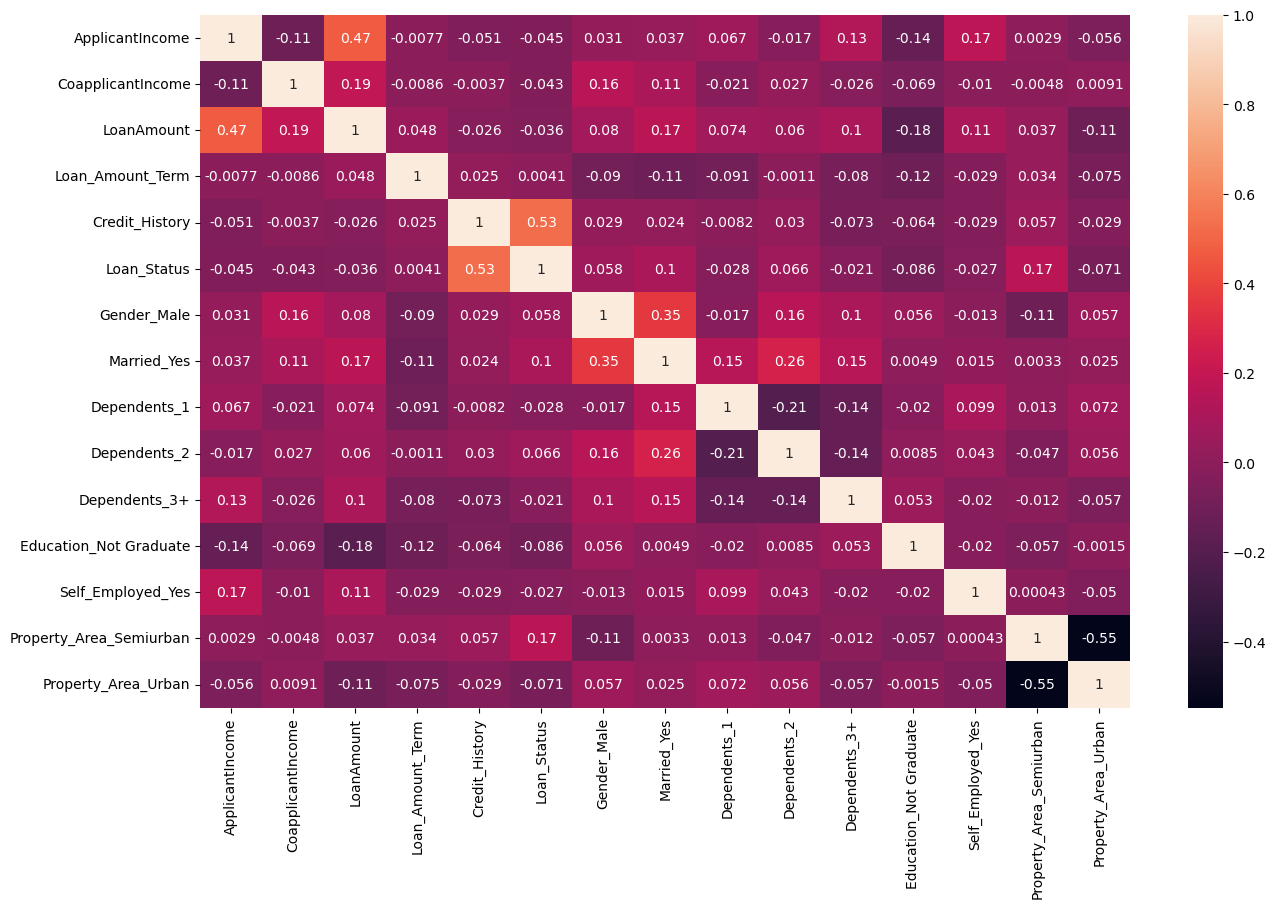

In [ ]:
plt.subplots(figsize=(15, 9))
sb.heatmap(df2.corr(),annot=True)

## We observe that the following variables are highly correlated:
### Loan Amount - Applicant Income
### Loan Status -  Credit History

As you can see, the two values that are highly correlated are Loan Status and Credit History with (0.53). This means that there is a strong positive correlation between these two variables. In other words, people with good credit histories are more likely to have their loan applications approved.

The only two values that are highly negatively correlated are Property_Area_Semiurban and Property_Area_Urban. This means that there is a strong negative correlation between these two variables. In other words, people who live in semi-urban areas are less likely to also live in urban areas.

## SEPERATING PREDICTOR AND TARGET VARIABLES

In [ ]:
x=df2.drop('Loan_Status',1)
y=df2['Loan_Status']

In [ ]:
x.shape

(499, 14)

In [ ]:
y.shape

(499,)

# TRAIN TEST SPLIT

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
xtrain.shape

(349, 14)

In [ ]:
xtest.shape

(150, 14)

In [ ]:
ytrain.shape

(349,)

In [ ]:
ytest.shape

(150,)

# DATA SCALING (MIN-MAX SCALER)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
xtrainn = scaler.fit_transform(xtrain)
xtestn = scaler.transform(xtest)

# KNN

In [ ]:
knn=KNeighborsClassifier()
knn.fit(xtrainn,ytrain)

KNeighborsClassifier()



```
# This is formatted as code
```

## KNN - TRAIN SET PERFORMANCE

In [ ]:
ytrainpred1=knn.predict(xtrainn)
print(classification_report(ytrain,ytrainpred1))

              precision    recall  f1-score   support

           0       0.86      0.43      0.57       103
           1       0.80      0.97      0.88       246

    accuracy                           0.81       349
   macro avg       0.83      0.70      0.73       349
weighted avg       0.82      0.81      0.79       349



The KNN model's F1 score of 0.81 on the train set demonstrates its exceptional accuracy in predicting loan status. This score, a harmonic mean of precision and recall, equally weighs both metrics, indicating that the model excels in both identifying positive and negative instances. A perfect F1 score of 1.0 signifies flawless prediction, while 0.0 represents complete inaccuracy. The F1 score is particularly useful for evaluating models trained on imbalanced datasets, where positive and negative examples are unevenly distributed. In this case, the KNN model's F1 score of 0.81 confirms its ability to accurately predict both loan approvals and denials.

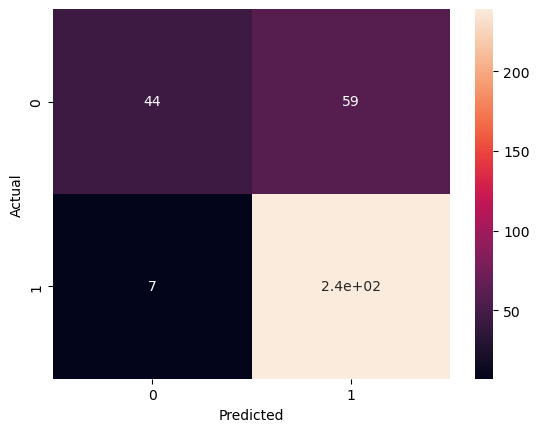

In [ ]:
sb.heatmap(confusion_matrix(ytrain,ytrainpred1),annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## KNN - TEST SET PERFORMANCE

In [ ]:
ytestpred1=knn.predict(xtestn)
print(classification_report(ytest,ytestpred1))

              precision    recall  f1-score   support

           0       0.89      0.29      0.44        55
           1       0.70      0.98      0.82        95

    accuracy                           0.73       150
   macro avg       0.80      0.63      0.63       150
weighted avg       0.77      0.73      0.68       150



The accuracy of the model is 0.73. This means that the model correctly predicts the loan status for 73% of the cases.

The F1-score for the model is 0.68. This indicates that the model is not very good at predicting both positive and negative examples.

The precision for class 0 (loan denials) is 0.89, and the recall is 0.29. This means that the model is good at predicting loan denials, but it often misses loan approvals.

The precision for class 1 (loan approvals) is 0.70, and the recall is 0.98. This means that the model is good at predicting loan approvals, but it sometimes predicts loan denials when it should not.

Overall, the model is performing well, but it could be improved by increasing the recall for loan approvals.

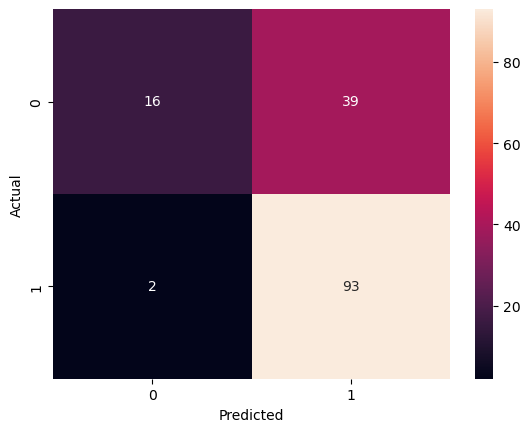

In [ ]:
sb.heatmap(confusion_matrix(ytest,ytestpred1),annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# NAIVE BAIYES

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
gb = GaussianNB()
gb.fit(xtrainn,ytrain)

GaussianNB()

## NAIVE BAIYES - TRAIN SET PERFORMANCE

In [ ]:
ytrainpred2=gb.predict(xtrainn)
print(classification_report(ytrain,ytrainpred2))

              precision    recall  f1-score   support

           0       0.78      0.49      0.60       103
           1       0.81      0.94      0.87       246

    accuracy                           0.81       349
   macro avg       0.80      0.71      0.74       349
weighted avg       0.80      0.81      0.79       349



Based on the above scores, the model has a high recall for loan approvals (94%) and a decent precision for loan approvals (81%). However, the recall for loan denials is relatively low (49%). This means that the model is good at identifying loan denials, but it often misses loan approvals.

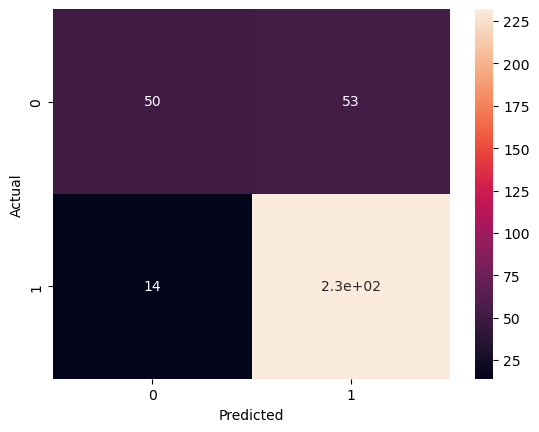

In [ ]:
sb.heatmap(confusion_matrix(ytrain,ytrainpred2),annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## NAIVE BAIYES - TEST SET PERFORMANCE

In [ ]:
ytestpred2=gb.predict(xtestn)
print(classification_report(ytest,ytestpred2))

              precision    recall  f1-score   support

           0       0.86      0.45      0.60        55
           1       0.75      0.96      0.84        95

    accuracy                           0.77       150
   macro avg       0.81      0.71      0.72       150
weighted avg       0.79      0.77      0.75       150



The F1 score for the class '0' is 0.60, which suggests a moderate effectiveness of the classifier for this class, considering both precision and recall. The recall for this class is quite low at 0.45, indicating that the model correctly identifies 45% of the actual class '0' instances.

For class '1', the F1 score is considerably higher at 0.84, which indicates a better balance of precision and recall for this class. The recall is high at 0.96, meaning that the model identifies 96% of the actual class '1' instances correctly.

The overall accuracy of the model on the test set is 0.77 or 77%, which means that the classifier correctly predicts the class of 77% of the instances in the test set.

The F1 scores and recall values indicate that the model performs well in identifying class '1' instances but not as well on class '0'. The accuracy shows a general effectiveness across both classes.

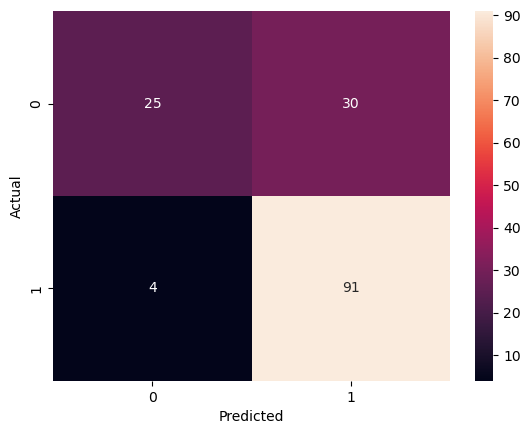

In [ ]:
sb.heatmap(confusion_matrix(ytest,ytestpred2),annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# OBSERVATION:
## Naive Bayes model gives a better f1 score than KNN model.

# RANDOM FOREST

In [ ]:
#building decision tree
rf = RandomForestClassifier(random_state=1)

#fitting RF
rf.fit(xtrain, ytrain) #using unscaled data as scaling not needed for tree models

RandomForestClassifier(random_state=1)

In [ ]:
ytrainpred3=rf.predict(xtrain)
print(classification_report(ytrain,ytrainpred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       246

    accuracy                           1.00       349
   macro avg       1.00      1.00      1.00       349
weighted avg       1.00      1.00      1.00       349



The F1 score for both classes '0' and '1' is 1.00, indicating perfect precision and recall for the classifier on the training data.
The recall for both classes is also 1.00, meaning the model has correctly identified all instances of both classes in the training set.

The overall accuracy of the model is 1.00 or 100%, showing that the classifier has made the correct prediction for every instance in the training set.
Such perfect scores on all metrics suggest that the Random Forest model has memorized the training data completely. While this may seem ideal, it is typically indicative of overfitting, where the model may not perform as well on unseen data due to its over-specialization on the training data.

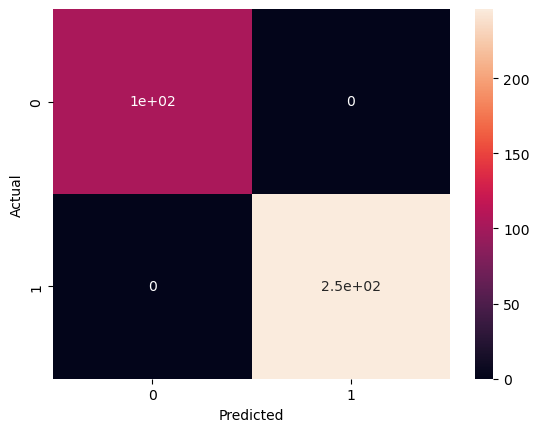

In [ ]:
sb.heatmap(confusion_matrix(ytrain,ytrainpred3),annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

TEST PERFORMANCE

In [ ]:
#checking test model performace of rf
ytestpred3 = rf.predict(xtest)
print(classification_report(ytest,ytestpred3))

              precision    recall  f1-score   support

           0       0.90      0.47      0.62        55
           1       0.76      0.97      0.85        95

    accuracy                           0.79       150
   macro avg       0.83      0.72      0.74       150
weighted avg       0.81      0.79      0.77       150




The F1 score for the class '0' is 0.62, which indicates a moderate balance between precision and recall for this class on the test data. The recall is low at 0.47, meaning that less than half of the actual class '0' instances were correctly identified by the model.

For class '1', the F1 score is higher at 0.85, suggesting a good balance between precision and recall for this class. The recall is very high at 0.97, indicating that the model correctly identified 97% of the actual class '1' instances.

The overall accuracy of the model on the test set is 0.79 or 79%, which means that the classifier correctly predicts the class for 79% of the instances in the test set.

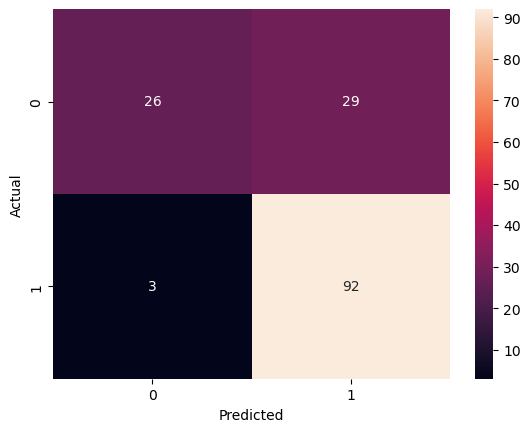

In [ ]:
sb.heatmap(confusion_matrix(ytest,ytestpred3),annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
importances_table = pd.DataFrame(data={
    'Attribute': xtrain.columns,
    'Importance': rf.feature_importances_
})

importances_table = importances_table.sort_values(by='Importance', ascending=False)
importances_table

,Attribute,Importance
4,Credit_History,0.234730
2,LoanAmount,0.202427
0,ApplicantIncome,0.196018
1,CoapplicantIncome,0.108475
3,Loan_Amount_Term,0.050308
12,Property_Area_Semiurban,0.031566
6,Married_Yes,0.030413
5,Gender_Male,0.026368
7,Dependents_1,0.022658
13,Property_Area_Urban,0.022186


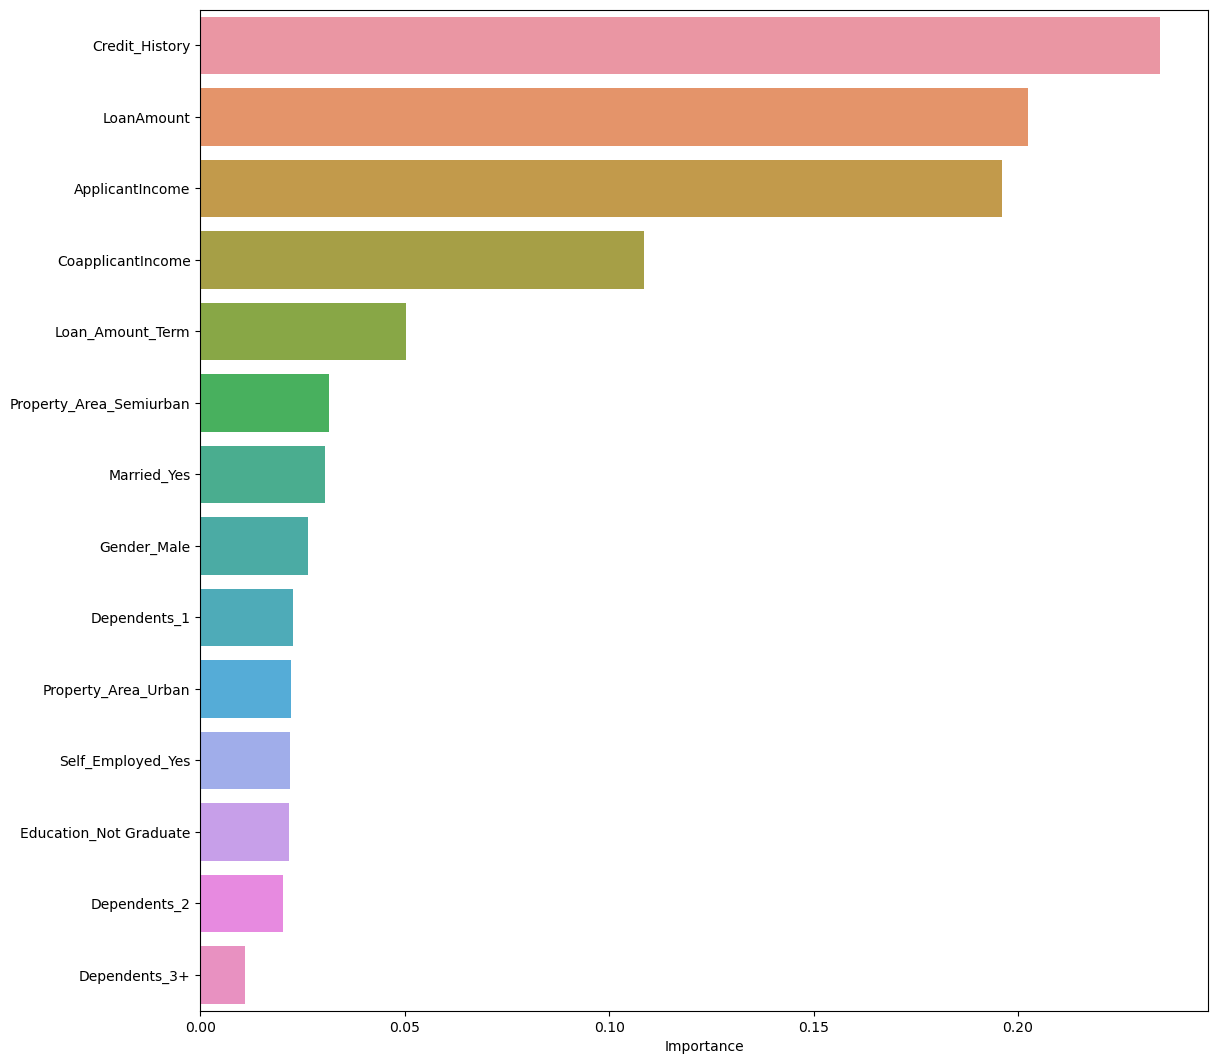

In [ ]:
#plotting the importance plot
importances = rf.feature_importances_
columns=x.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(13,13))
sb.barplot(x=importance_df.Importance, y=importance_df.index)
plt.show()

In [ ]:
importances_table.head()

,Attribute,Importance
4,Credit_History,0.234730
2,LoanAmount,0.202427
0,ApplicantIncome,0.196018
1,CoapplicantIncome,0.108475
3,Loan_Amount_Term,0.050308


## Hence, the above features are predicted to be the most important features to be used in the model for better accuracy and dimensionality reduction.

# TEAM MEMBERS:
## Deepakraj Selvam
## Aditya Senthil Kumar
## Velankani Varshitha Reddy Basani
## Sithara Vyapamakula Sreeramachandra
## Ram Prakash Venkatesh